
#Parkinson’s disease speech classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data  = pd.read_csv(r"../pd_speech_features-huge.csv")
data.head()


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [4]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [5]:
data.shape

(756, 755)

In [6]:
#now separate the data and datalabel
y = data["class"].copy()
x = data.drop("class",axis=1)
x.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164


In [7]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [8]:
y.value_counts()


1    564
0    192
Name: class, dtype: int64

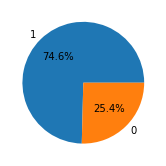

In [9]:
#plot the 0 and 1 value
label = y.unique()
plt.subplot(1,2,1)
plt.pie(y.value_counts(),autopct='%1.1f%%',labels=label)
plt.show()

In [10]:
import seaborn as sns

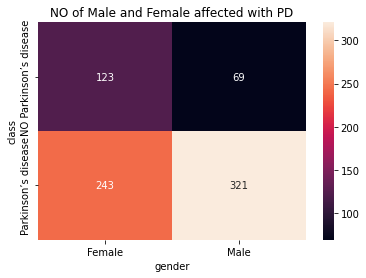

In [11]:
sns.heatmap(pd.crosstab(data['class'],data['gender']).astype('int64'), 
            yticklabels=['NO Parkinson’s disease','Parkinson’s disease'],
            xticklabels=['Female','Male'],
           annot = True,
           fmt='d')
plt.title("NO of Male and Female affected with PD")
plt.show()

We have:

* 123 Females and 69 Males without PD
* 243 Females and 321 Males with PD

In [12]:

#Check the null values
data.isnull().sum()

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [13]:


#now the dataset don't have a null value but future dataset we can't give assure
#may be the null values might be come ,so 
#we have used the SimpleImputer to avoid the null values

from  sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") 

# caluculate the median value in the dataset 

In [14]:
imputer.fit(x)

SimpleImputer(strategy='median')

In [15]:
imputer.statistics_[:3]

array([125.5     ,   1.      ,   0.809655])

In [16]:
x = imputer.transform(x)

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [18]:
pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])

#Split the datasets


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [20]:
print("X_train",len(x_train),"\nX_test",len(x_test),"\nY_train",len(y_train),"\nY_test",len(y_test))

X_train 604 
X_test 152 
Y_train 604 
Y_test 152


In [21]:
from sklearn.metrics import recall_score,precision_score,f1_score,confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_predict 

def calculate_score(estimator,x_train,y_train,classifer_name):
    
    data_prediction = cross_val_predict(estimator,x_train,y_train,cv=3)
    recall = recall_score(y_train,data_prediction)
    precision = precision_score(y_train,data_prediction)
    f1score = f1_score(y_train,data_prediction)
    accuracy = accuracy_score(y_train,data_prediction)
    
    dataframe ={'Estimator':classifer_name,'recall':recall,'precision':precision,'f1_score':f1score,'Accuracy':accuracy}
    matrix = confusion_matrix(y_train,data_prediction)
    sns.heatmap(matrix.astype('int64'),
                yticklabels=['NO PD','PD'],
                xticklabels=['NO PD','PD'],fmt='d',annot = True)
    plt.title(classifer_name)
    plt.show()
    
    data = pd.DataFrame(dataframe,index=[0])
    return data 



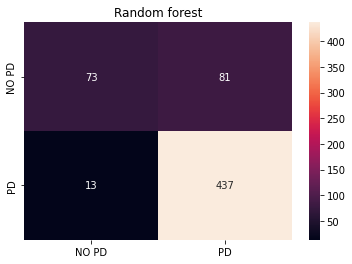

,Estimator,recall,precision,f1_score,Accuracy
0,Random forest,0.971111,0.843629,0.902893,0.844371


In [22]:
#Train a model using Random forest

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=2)

x_train_prepared = pipe.fit_transform(x_train)

forest_result = calculate_score(forest_clf,x_train_prepared,y_train,"Random forest")
forest_result

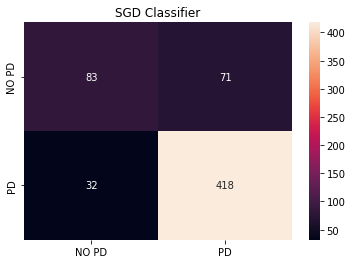

,Estimator,recall,precision,f1_score,Accuracy
0,SGD Classifier,0.928889,0.854806,0.890309,0.82947


In [23]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=2)
sgd_result = calculate_score(sgd_clf,x_train_prepared,y_train,"SGD Classifier")
sgd_result


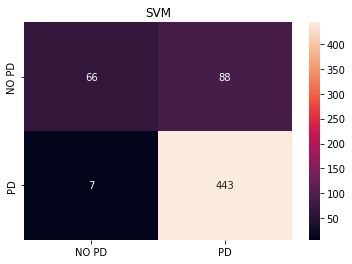

,Estimator,recall,precision,f1_score,Accuracy
0,SVM,0.984444,0.834275,0.90316,0.842715


In [24]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=2)

svm_result = calculate_score(svm_clf,x_train_prepared,y_train,"SVM")
svm_result

In [25]:
model_compare =  pd.concat([svm_result,forest_result])
model_compare = pd.concat([model_compare,sgd_result])

In [26]:
model_compare.sort_index(inplace=True)
model_compare

,Estimator,recall,precision,f1_score,Accuracy
0,SVM,0.984444,0.834275,0.903160,0.842715
0,Random forest,0.971111,0.843629,0.902893,0.844371
0,SGD Classifier,0.928889,0.854806,0.890309,0.829470


* here am taking some example of algorithm
* SGD provides us with the best recall/precision tradeoff out-of-box

* SGD classifier is relatively fast (in comparison with other boostings), so we can it for tuning

* so here we are using a SGD classifier 


In [27]:
sgd_clf.fit(x_train_prepared,y_train)

SGDClassifier(random_state=2)

In [28]:

some_data = x_test[:2]
some_data

array([[127.     ,   1.     ,   0.82019, ...,  15.2534 ,  14.9213 ,
         46.0978 ],
       [162.     ,   0.     ,   0.79695, ...,  30.4666 ,  37.6791 ,
         76.5819 ]])

In [29]:
some_data_prepared = pipe.transform(some_data)
some_data_prepared

array([[ 0.04066319,  0.99669421,  0.43325476, ...,  0.04795492,
         0.0347667 ,  0.45543847],
       [ 0.52036171, -1.00331676,  0.28917888, ...,  1.02686165,
         1.63437918,  1.35462311]])

In [30]:
sgd_clf.predict(some_data_prepared)

array([1, 1], dtype=int64)

In [31]:
#now we have to simply cross check 
some_label =y_test[:2]
some_label

381    1
488    1
Name: class, dtype: int64

In [32]:
#now we can use cross validation for get the scores 
from sklearn.model_selection import cross_val_score

scores = cross_val_score(sgd_clf,x_train_prepared,y_train,cv=10,scoring="accuracy")
scores

print("score mean",scores.mean())

score mean 0.829398907103825


now the model produces a 82% accuracy of the dataset
#Fine Tune your model
 Grid search

In [33]:
from sklearn.model_selection import GridSearchCV

param =[{
    'n_jobs':[10,25],'n_iter_no_change':[5,3,5]
}] 
    
    

In [34]:
Grid = GridSearchCV(sgd_clf,param,cv=5,scoring='accuracy')
Grid

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=2),
             param_grid=[{'n_iter_no_change': [5, 3, 5], 'n_jobs': [10, 25]}],
             scoring='accuracy')

In [35]:
Grid.fit(x_train_prepared,y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=2),
             param_grid=[{'n_iter_no_change': [5, 3, 5], 'n_jobs': [10, 25]}],
             scoring='accuracy')

In [36]:
Grid.predict(some_data_prepared)

array([1, 1], dtype=int64)

In [37]:
Grid.best_score_

0.8410192837465564

In [38]:
#The model produce a accuracy for 84 % now we can try for a new Algorithm

svm_clf.fit(x_train_prepared,y_train)

SVC(random_state=2)

In [39]:
#Evaluate the system test 

final_model = Grid.best_estimator_

x_test_prepared = pipe.transform(x_test)

final_prediction = final_model.predict(x_test_prepared)

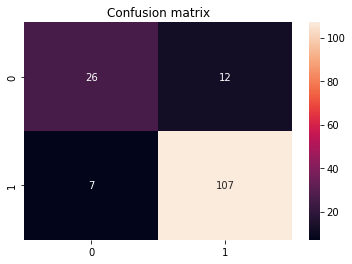

In [40]:
confusion_matrix  = confusion_matrix(y_test,final_prediction)
def plot_confusion_matrix(matrix):
    sns.heatmap(matrix,annot =True,fmt='d')
    plt.title("Confusion matrix")
    plt.show()

plot_confusion_matrix(confusion_matrix)

In [41]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,final_prediction)

0.875

In [42]:
precision_score(y_test,final_prediction)

0.8991596638655462

In [43]:
recall_score(y_test,final_prediction)

0.9385964912280702

* Finally The model perform well in  Parkinson’s disease speech.A trivial way to have perfect prediction is to make one single positive prediction ensure it is correct (precision= 1/1=100)

* The precision score is 89%, which indicates that the model correctly identified the samples and  also the model predict the test data with accuarcy of 87 % 
